In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Regression_Container

Num_Points = 1


In [2]:
# Load Boston model

Boston_Data = BB_Model('Boston')

#Boston_Data.df().head()

In [3]:
Boston_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4502377437046916


MLPRegressor(random_state=RandomState(MT19937) at 0x2BB23DE9840)

In [4]:
Boston_Data.Random_Forest()

0.8562062304275784


RandomForestRegressor(random_state=RandomState(MT19937) at 0x2BB23DE9840)

In [5]:
print(Boston_Data.get_features())

['crime_rate', 'zoned_lots', 'industry', 'by_river', 'NOX', 'avg_rooms', 'pre_1940', 'emp_distance', 'rad_access', 'tax_rate', 'pupil_tea_rat', 'low_status']


In [6]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()


#Initializing the explainer object
Unravel_Exp = UR_Model(bbox_model           = Boston_Data.get_Random_Forest(),
                       train_data           = X_train,
                       feature_names        = Boston_Data.get_features(),
                       categorical_features = Boston_Data.get_catagorical(),
                       mode                 = Boston_Data.get_mode(),
                       sampling_optimize    = "Gaussian")       


In [7]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [1.32910222e+00 1.33698061e+01 1.02116343e+01 7.20221607e-02
 5.39911357e-01 6.33192244e+00 6.53396122e+01 4.10200803e+00
 7.47368421e+00 3.70939058e+02 1.82146814e+01 1.13095014e+01]
Std 0:  [2.37124426e+00 2.53257110e+01 6.86183478e+00 2.58524600e-01
 1.16046963e-01 6.48935830e-01 2.84384646e+01 2.12781987e+00
 7.30309387e+00 1.46348639e+02 2.26941130e+00 6.07864654e+00]


In [8]:
#for i in range(5):
#    print(X_test[i,:])

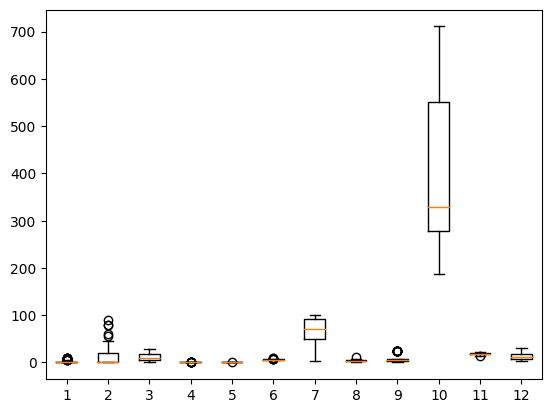

In [9]:
from matplotlib import pyplot
pyplot.boxplot(x=X_test)
pyplot.show()

In [10]:
# Generate explantion data for Random Forest

Boston_Stats = Feature_Statistics(feature_names = Boston_Data.get_features(), mode = Boston_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
    Unravel_Exp.explain(X_init            = data_row,
                        alpha             = "FUR_W",
                        max_iter          = 5,
                        normalize         = False)
    
    scores = Unravel_Exp.permutation_importance(show_plot=False)
       
#    scores = Unravel_Exp.KL_imp(show_plot=False)
       
    f_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.exp_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    
    print(f_predict, e_predict)
    

    Boston_Stats.Add_Sample(sample_scores = scores,
                            outcome       = y_test[test_instance],
                            X_row         = data_row,
                            f_prediction  = f_predict,
                            e_prediction  = e_predict,
                            feopt         = 0,
                            model         = Unravel_Exp.get_exp_model())
    

INSTANCE:  0
crime_rate:	 0.00056
zoned_lots:	 3.15602
industry:	 0.00579
by_river:	 0.00000
NOX:	 0.00000
avg_rooms:	 0.00001
pre_1940:	 0.11603
emp_distance:	 0.00075
rad_access:	 0.43334
tax_rate:	 80.30779
pupil_tea_rat:	 0.00089
low_status:	 0.09483
[16.074] [1.60740000e+01 1.00000004e-05]


In [11]:
#stop!!

In [12]:
#Default settings
#from unravel_2.ur_model import UR_Model

#X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()


#Initializing the explainer object
Unravel_Exp_LHC = UR_Model(bbox_model           = Boston_Data.get_Random_Forest(),
                           train_data           = X_train,
                           feature_names        = Boston_Data.get_features(),
                           categorical_features = Boston_Data.get_catagorical(),
                           mode                 = Boston_Data.get_mode(),
                           sampling_optimize    = "LatinHyperCube")       


In [13]:
# Generate explantion data for Random Forest

Boston_S_LHC = Feature_Statistics(feature_names = Boston_Data.get_features(), mode = Boston_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
    Unravel_Exp_LHC.explain(X_init            = data_row,
                            alpha             = "FUR_W",
                            max_iter          = 5,
                            normalize         = False)
    
    scores = Unravel_Exp.permutation_importance(show_plot=False)
       
#    scores = Unravel_Exp.KL_imp(show_plot=False)
       
    f_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.exp_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    
    print(f_predict, e_predict)
    

    Boston_S_LHC.Add_Sample(sample_scores = scores,
                            outcome       = y_test[test_instance],
                            X_row         = data_row,
                            f_prediction  = f_predict,
                            e_prediction  = e_predict,
                            feopt         = 0,
                            model         = Unravel_Exp.get_exp_model())
    

INSTANCE:  0
crime_rate:	 0.00064
zoned_lots:	 3.49060
industry:	 0.00652
by_river:	 0.00000
NOX:	 0.00000
avg_rooms:	 0.00001
pre_1940:	 0.14783
emp_distance:	 0.00085
rad_access:	 0.51684
tax_rate:	 83.11064
pupil_tea_rat:	 0.00109
low_status:	 0.10268
[16.074] [1.60740000e+01 1.00000004e-05]


In [14]:
#stop!!

In [15]:

Boston_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

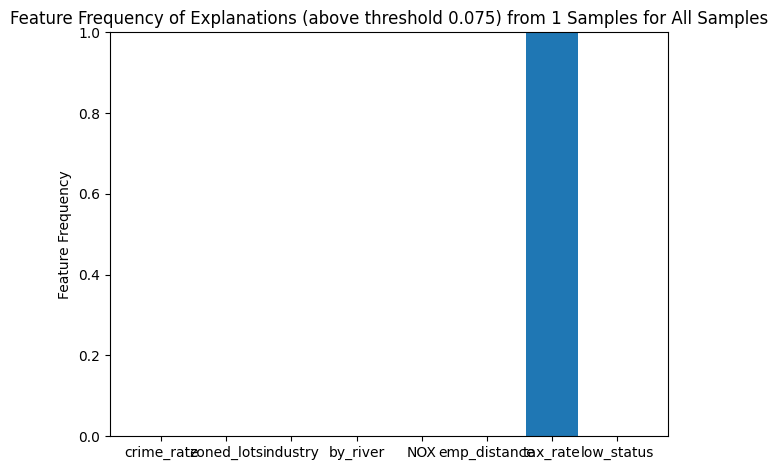

In [16]:
Boston_Stats.Frequency_Plot()

top_features True
top_features (1, 8)


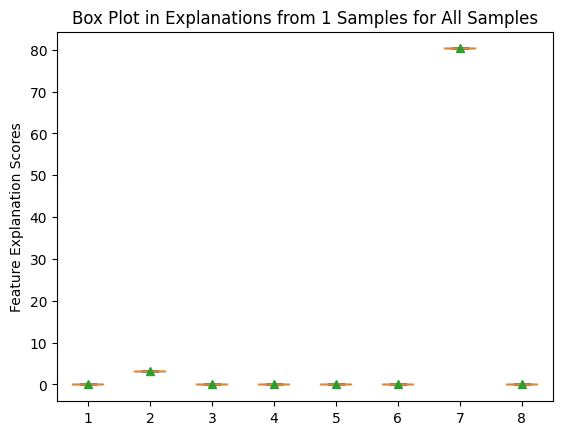

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      emp_distance
7 -      tax_rate
8 -      low_status


In [17]:
Boston_Stats.Box_Plot()

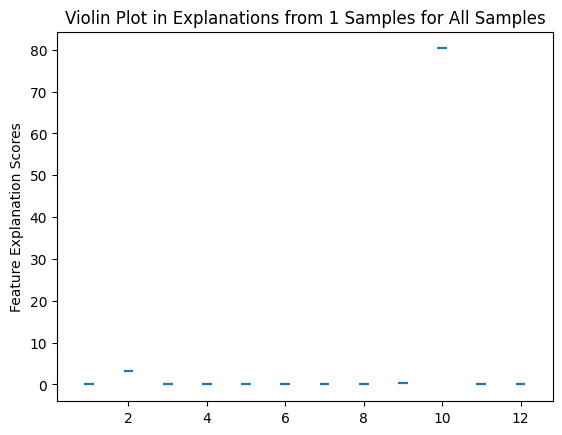

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      avg_rooms
7 -      pre_1940
8 -      emp_distance
9 -      rad_access
10 -     tax_rate
11 -     pupil_tea_rat
12 -     low_status


In [18]:
Boston_Stats.Violin_Plot(top_features=False)

In [19]:
Boston_Container = Regression_Container(Boston_Stats, 5)

Boston_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.05)


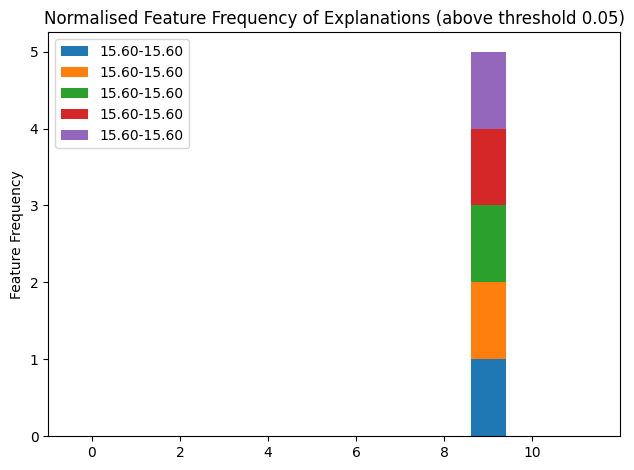

0 -      crime_rate
1 -      zoned_lots
2 -      industry
3 -      by_river
4 -      NOX
5 -      avg_rooms
6 -      pre_1940
7 -      emp_distance
8 -      rad_access
9 -     tax_rate
10 -     pupil_tea_rat
11 -     low_status


In [20]:
Boston_Container.Frequency_Plot()

In [21]:
Boston_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           0.47399999999998776  :  0.0  :  0.47399999999998776
y - exp(x):          0.47399999724668795  :  0.0  :  0.47399999724668795
BB(x) - exp(x):      2.7532998103652062e-09  :  0.0  :  2.7532998103652062e-09
Average exp(x) var:  1.0000000413701846e-05


In [22]:
Boston_Stats.Jaccard_Values()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean Jaccard Similarity:  nan
Mean Jaccard Distance:    nan


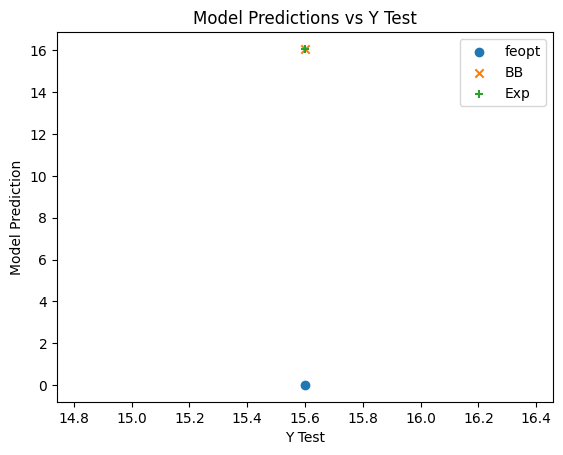

In [23]:
Boston_Stats.Reg_Fidelity_Graph()

In [24]:
Boston_Stats.Consistancy(X_train=X_train)

[0.0021959] [0.9999999] 4
[5.13147672e-06] [1.] 3
[0.16387363] [0.99952324] 5
[2.00475701e-09] [1.] 2
[2.49318353] [0.93711792] 6
[1.29741327e-13] [1.] 1
[10.18034182] [0.76677246] 7
[1.3882407e-18] [1.] 0
[10.62246559] [0.9136937] 8
SD 	 Y pred	 Y var
-2.0:	 0.000	 1.000
-1.5:	 0.000	 1.000
-1.0:	 0.000	 1.000
-0.5:	 0.000	 1.000
0.0:	 0.002	 1.000
0.5:	 0.164	 1.000
1.0:	 2.493	 0.937
1.5:	 10.180	 0.767
2.0:	 10.622	 0.914
